# **About The Dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Source: https://www.kaggle.com/harlfoxem/housesalesprediction

## ***Feature Columns***

    id - Unique ID for each home sold
    date - Date of the home sale
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

***Task:*** Predicting prices based on other features


# **1. Getting familier with dataset**

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
df =  pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
df.isnull().sum()

# **2. Feature Engineering**

In [ ]:
# Dropping 'id' column
df.drop('id',axis=1,inplace=True)

In [ ]:
# Formatting and extracting 'year' and 'month' from "date" column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [ ]:
# Dropping 'date' column
df.drop('date',axis=1,inplace=True)

In [ ]:
# Dropping 'zipcode' column
df.drop('zipcode',axis=1,inplace=True)

In [ ]:
df.head()

# **3. EDA**

In [ ]:
# Visualizing categorical columns using countplot
cols = ['floors','waterfront','view','condition','grade']
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(10,15))

for n,i in enumerate(cols):
    sns.countplot(x=cols[n], data=df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

In [ ]:
# Visualizing correlation numerical columns using heatmap
num_features = df.columns[~df.columns.isin(cols)].tolist()
plt.figure(figsize=(20,15))
sns.heatmap(df[num_features].corr(),cmap="YlGnBu",annot=True)
plt.show()

# **4. Data Preparation**

## **a) Train-Test Split**

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Train samples:",X_train.shape)
print("Test samples:",X_test.shape)

## **b) Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **5. Model Building and Evaluation using ANN**

For implementing MLPs or ANN we will be using Keras, which is a high-level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. Its documentation (or specification) is available at https://keras.io.

To access Keras API there are two ways, as shown below:
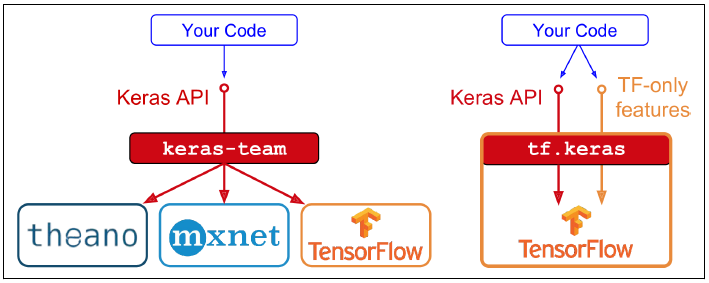

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from tensorflow import keras
keras.__version__

## **a) Model Creation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Shape of input i.e. a 1D array having 19 features
X_train_scaled.shape[1:]

In [ ]:
model = Sequential(name="House_price_pred")

# Adding input layer
model.add(Dense(19,activation='relu',input_shape=X_train_scaled.shape[1:],name="input"))
# Adding hidden layers
model.add(Dense(30,activation='relu',name="hidden_1"))
model.add(Dense(25,activation='relu',name="hidden_2"))
model.add(Dense(15,activation='relu',name="hidden_3"))
# Adding output layer
model.add(Dense(1,name="output"))


In [ ]:
model.summary()

In [ ]:
# Weights and biases connected to output layer
model.layers[4].weights

In [ ]:
model.layers

In [ ]:
for layer in model.layers:
  print("Layer name : ",layer.name)

## **b) Compiling the Model**

Resource Links:
- Loss : https://keras.io/api/losses/
- optimizer : https://keras.io/api/optimizers/
- metric : https://keras.io/api/metrics/

In [ ]:
# model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])
model.compile(optimizer='adam',loss='mean_squared_error')

## **c) Training the Model**

In [ ]:
type(y_test)

In [ ]:
type(y_test.values)

In [ ]:
%%time
model.fit(x=X_train_scaled,y=y_train.values,
          validation_data=(X_test_scaled,y_test.values),
          batch_size=128,epochs=200)

# batch_size : backpropagation will be occur once 128 samples have been through forward pass. 
# Validation_data : A separate chunk of data kept aside to measure the model loss while the model is being trained
# epochs : Number of times the model will go through the entire dataset 

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## **d) Making predictions and evaluating the model**

### **i)Making Predictions**

In [ ]:
# Making predictions
predictions = model.predict(X_test_scaled)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'y')

plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title('y_test vs y_pred_test')
plt.show()

Above scatter plot shows that y_test and predictions show a linear relationship.

### **ii)Evaluating the model**

In [ ]:
# r2_score on test set
from sklearn.metrics import r2_score
round(r2_score(y_test,predictions),2)

In [ ]:
# Evaluting model in test set using "MSE"
model.evaluate(X_test_scaled, y_test)

In [ ]:
output = pd.DataFrame((y_test.values),columns=["Y_True"])
output['Y_pred'] = predictions
output['error'] = output['Y_True']-output['Y_pred']
output.head()

In [ ]:
plt.hist(output['error'],bins=100)
plt.title("Residual Plot")
plt.show()

As per residual plot, error seems to follow a uniform distribution i.e. the residual plot shows a fairly random pattern. This random pattern indicates that a linear model provides a decent fit to the data.